In [ ]:
import numpy as np

In [ ]:
class PCA:
  
  def __init__(self, n_components):
    self.n_components = n_components
    self.components = None
    self.mean = None

  def fit(self, X):
    #calculating mean
    self.mean = np.mean(X, axis=0)
    X = X - self.mean
    #calculating covariance matrix
    covariance = np.cov(X.T)
    #calculating eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(covariance)
    #sorting eigenvectors
    eigenvectors = eigenvectors.T
    indexes = np.argsort(eigenvalues)[::-1] #decreasing order
    eigenvalues = eigenvalues[indexes]
    eigenvectors = eigenvectors[indexes]
    #storing first n eigenvectors
    self.components = eigenvectors[0:self.n_components]

  def transform(self, X):
    X = X - self.mean
    return np.dot(X, self.components.T)

In [ ]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

In [ ]:
diabetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [ ]:
X = diabetes.data
y = diabetes.target

In [ ]:
pca = PCA(2)
pca.fit(X)
X_projection = pca.transform(X)

In [ ]:
print(X.shape)

(442, 10)


In [ ]:
print(X_projection.shape)

(442, 2)


In [ ]:
pca1 = X_projection[:, 0]
pca2 = X_projection[:, 1]

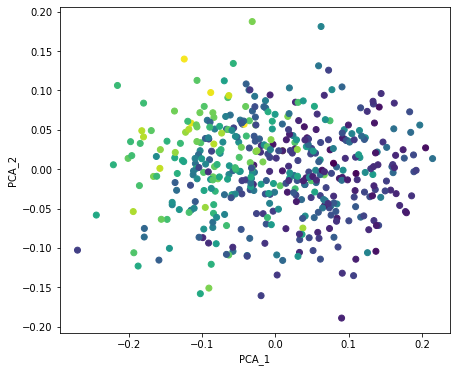

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))
plt.scatter(pca1,pca2,c=y)
plt.xlabel("PCA_1")
plt.ylabel("PCA_2")
plt.show()

In [ ]:
import pandas as pd
z = pd.DataFrame(X_projection, columns = ['PCA 1', 'PCA 2'])

In [ ]:
z.head()

,PCA 1,PCA 2
0,-0.027931,0.092601
1,0.134686,-0.065263
2,-0.012945,0.077764
3,-0.002345,-0.018182
4,0.035981,-0.038621


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(z)

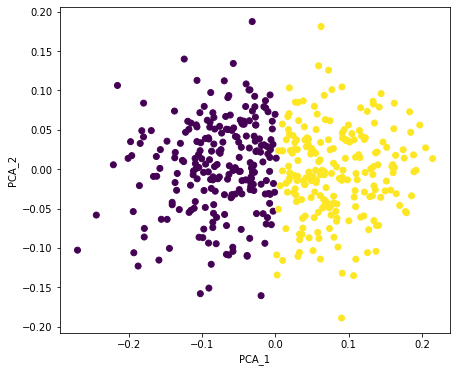

In [ ]:
label = kmeans.labels_

plt.figure(figsize=(7,6))
plt.scatter(z['PCA 1'], z['PCA 2'], c=label)
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.show()

In [ ]:
from sklearn import metrics
sil_score = metrics.silhouette_score(z, label)
sil_score

0.4323836712248734